In [238]:
#Import libraries and modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")

In [239]:
#Import Dataset
data=pd.read_csv('spam.csv',encoding ='latin-1')
data.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [240]:
## make a copy of the data
data = data.copy() 
#remove empty columns
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

#rename the label and text columns
data = data.rename(columns={"v1":"label", "v2":"text"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [241]:
#Replace ham and spam with 0 and 1
data['label']=data['label'].map({'ham':0,'spam':1})


In [242]:
#split dataset into x and y inputs
train_msg, test_msg, train_labels, test_labels =train_test_split(data['text'],data['label'],test_size=0.2,random_state=434)

In [243]:
#Input vocabulary size and maximum input length
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [244]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [245]:
#Ensure all sequences are equal in length
padding_type='post'
truncate_type='post'
Training_seq=token.texts_to_sequences(train_msg)
Training_pad=pad_sequences(Training_seq,maxlen=50,padding=padding_type,truncating=truncate_type)
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [246]:
#Define model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [247]:
#Compile Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [248]:
#Train Model
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#Fit the Training data into the model
history=model.fit(Training_pad, train_labels ,
                  validation_data=(Testing_pad, test_labels),
                  epochs=epoch,
                  callbacks=[early_stop]
                  ,verbose=2)

Epoch 1/30
140/140 - 1s - loss: 0.4916 - accuracy: 0.8499 - val_loss: 0.3104 - val_accuracy: 0.8771 - 1s/epoch - 9ms/step
Epoch 2/30
140/140 - 0s - loss: 0.2833 - accuracy: 0.8631 - val_loss: 0.2119 - val_accuracy: 0.8771 - 259ms/epoch - 2ms/step
Epoch 3/30
140/140 - 0s - loss: 0.1850 - accuracy: 0.9284 - val_loss: 0.1454 - val_accuracy: 0.9614 - 266ms/epoch - 2ms/step
Epoch 4/30
140/140 - 0s - loss: 0.1209 - accuracy: 0.9659 - val_loss: 0.1062 - val_accuracy: 0.9686 - 258ms/epoch - 2ms/step
Epoch 5/30
140/140 - 0s - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.0901 - val_accuracy: 0.9695 - 255ms/epoch - 2ms/step
Epoch 6/30
140/140 - 0s - loss: 0.0656 - accuracy: 0.9805 - val_loss: 0.0849 - val_accuracy: 0.9713 - 271ms/epoch - 2ms/step
Epoch 7/30
140/140 - 0s - loss: 0.0553 - accuracy: 0.9838 - val_loss: 0.0788 - val_accuracy: 0.9749 - 253ms/epoch - 2ms/step
Epoch 8/30
140/140 - 0s - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0780 - val_accuracy: 0.9758 - 250ms/epoch - 2ms/step
Epo

In [249]:
#evaluate model results

result = model.evaluate(Testing_pad, test_labels)
accuracy = result[1]

35/35 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9776


Text(0.5, 0, 'epoch')

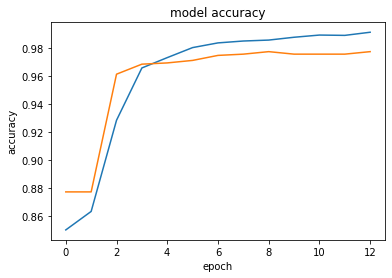

In [250]:
#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [251]:
#Input and Pre-process another dataset for testing
test_df=pd.read_csv('output_spam.csv')
test_df.drop(columns=["Unnamed: 0"] ,inplace=True)
text = np.asanyarray(test_df['text'])
print(text)

['Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)'
 'staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323'
 "Send me yetty's number pls."
 'Hey so this sat are we going for the intro pilates only? Or the kickboxing too? '
 'I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.'
 'Hey we can go jazz power yoga hip hop kb and yogasana '
 'Hey mate. Spoke to the mag people. We‰Û÷re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. '
 'Morning only i can ok.' 'Wat time Ì_ finish?'
 'Shant disturb u anymore... Jia you...'
 '4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt'
 'Your opinion about me? 1. Over 2. Jada 3

In [252]:
#Predict using model and test dataset

def predict_spam(text):
    new_seq = token.texts_to_sequences(text)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
output = predict_spam(text)


1/1 [==============================] - 0s 61ms/step


In [253]:
#Display output with results as percentage
output_percent = [i * 100 for i in output]
Classify = ['Spam' if i > 10 else 'Ham' for i in output_percent]


In [254]:
#Extract Results to .csv file
df=pd.DataFrame(Classify,text, columns = ['Spam Percentage']).to_csv('D:\Andrei\jupyteroutputs\\mercado_output_spam.csv')